In [ ]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install --upgrade plotly
!pip install --upgrade plotly

In [ ]:
data1 = pd.read_csv("heart.csv")
data1.head()

#kolom age - thall merupakan variabel independen, output merupakan dependen

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
display(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

Karena data terdiri dari 2 type yaitu kategorikal & continues value, untuk memudahkan proses analisis kita pisahkan kolomnya.

In [ ]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

In [ ]:
#Memisahkan data berdasarkan gender
X=data1[data1["sex"]==1].reset_index()  
Y=data1[data1["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [ ]:
ax= px.pie(data1, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
ax.show()
#disini kita belum bisa menentukan yang mana merupakan male atau female.

In [ ]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("Average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
Average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


Berdasarkan hasil dari kalkulasi dan survei dari harvard researchers, kita bisa menyimpulkan bahwa label '0' merupakan Laki-laki, label '1' merupakan Perempuan.

In [ ]:
print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

Female Value Counts: 
0    114
1     93
Name: output, dtype: int64
Male Value Counts: 
1    72
0    24
Name: output, dtype: int64


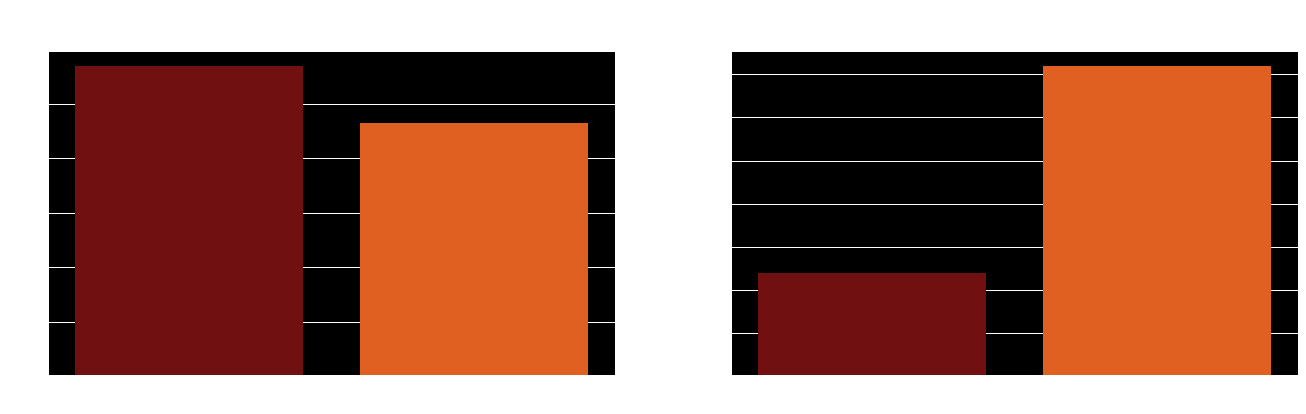

In [ ]:
fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot("output", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot("output", data=Y, palette='gist_heat',ax=ax1[1])

fig.show()

Age Distribution:
Bisa dilihat dari data bahwa perempuan memiliki bagian yang lebih banyak didalam penelitian ini. Range perempuan (27-77 tahun), laki-laki (34-76 tahun)

In [ ]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

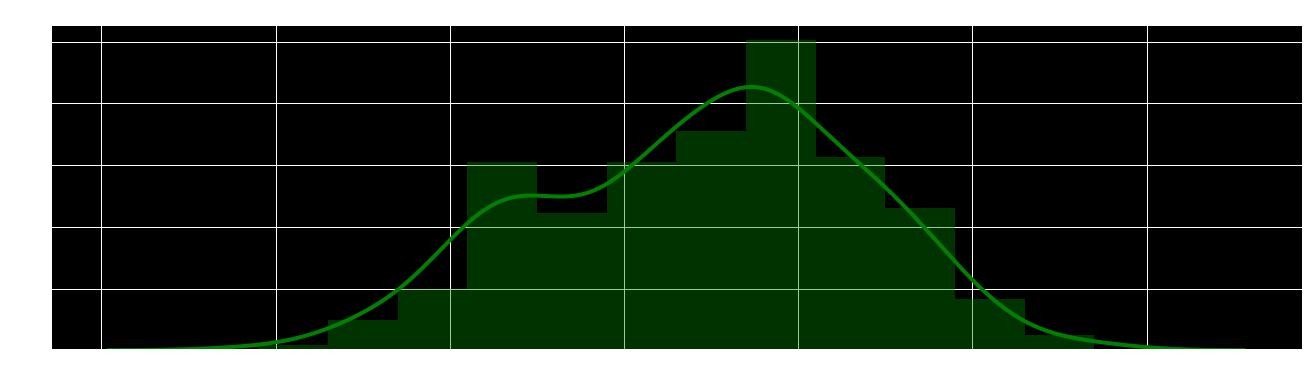

In [ ]:
#Distribution plots
plt.figure(figsize=(20,6))
sns.distplot(data1["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()

#Plot 1: Plot pertama menunjukkan distribusi total usia untuk semua individu dalam survei. Kebanyakan dari mereka adalah antara kelompok usia 50-60 dan sangat sedikit di kedua sisi.

Data Pre-Processing

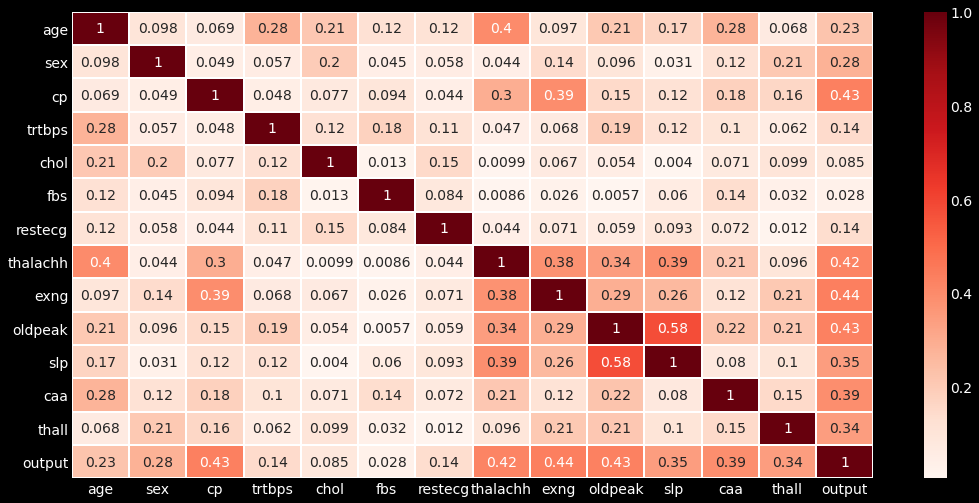

In [ ]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

#Kita dapat melihat bahwa tidak ada kolom yang berkorelasi tinggi dengan output, dengan korelasi maksimum 0,436757 untuk "exng" dan korelasi minimum 0,028046 untuk "fbs".

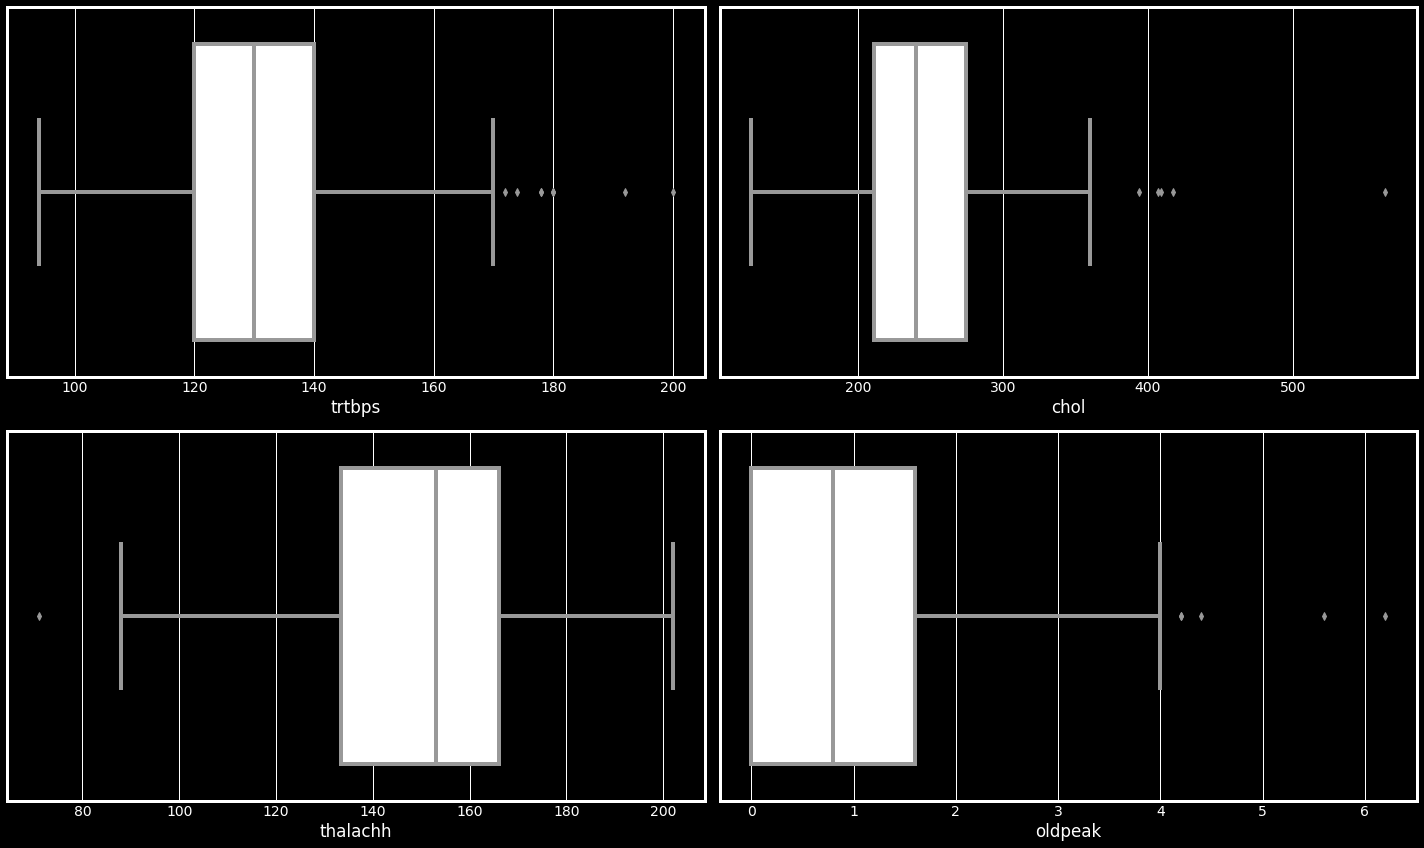

In [ ]:
#boxplot untuk melihat outlier
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data1,x=data1[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

Jelas, tidak banyak outlier tetapi kita masih harus berusaha meminimalkannya sebanyak yang kita bisa. Kita dapat mengambil log kolom ini untuk membawa semua nilai dalam rentang dan meminimalkan outlier.

In [ ]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trtbps"]= np.log(data1.trtbps)
data1["chol"]= np.log(data1.chol)
data1["thalachh"]= np.log(data1.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


Data Splitting and Scaling


In [ ]:
#Membagi data menjadi set training dan testing menggunakan train_test_split dari sklearn.preprocessing. Setelah dibagi, menskalakan data  menggunakan scaler MinMax sebelum menggunakannya untuk melatih model.

#Data Splitting
X=data1.iloc[:,:13]
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)



Tampilan Fungsi untuk memplot dan menghitung data.
Menggunakan fungsi ini untuk setiap model secara terpisah.

In [ ]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

Execution time of model: 0.01019 seconds



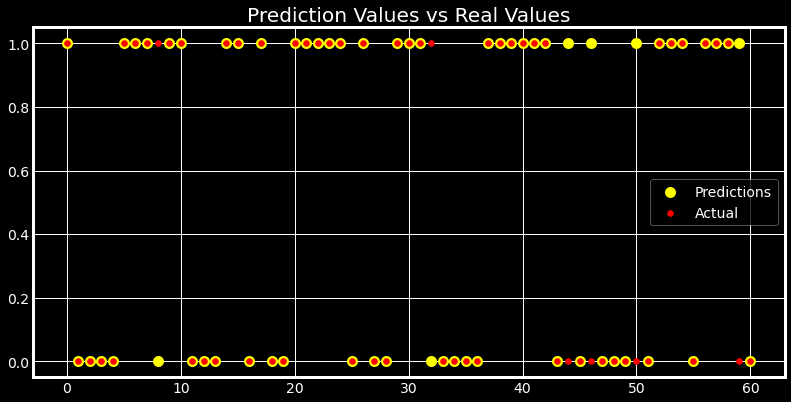

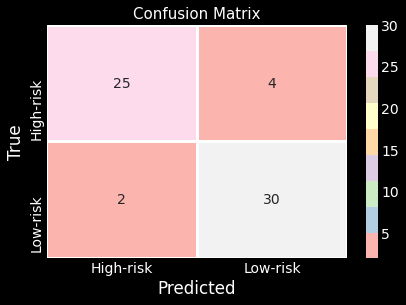

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [ ]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)



In [ ]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)